In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [ ]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [ ]:
    import numpy as np
    import matplotlib.pyplot as plt
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.optimizers import Adam
    from keras.utils.np_utils import to_categorical
    from keras.layers import Dropout, Flatten
    from keras.layers.convolutional import Conv2D, MaxPooling2D
    import pickle
    import pandas as pd
    import random
    import cv2

Using TensorFlow backend.


In [ ]:
np.random.seed(0)

In [ ]:
with open('german-traffic-signs/train.p',mode='rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p',mode='rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p',mode='rb') as f:
  test_data = pickle.load(f)

print(type(train_data))

X_train , y_train = train_data['features'] , train_data['labels'] 
X_val , y_val = val_data['features'] , val_data['labels'] 
X_test , y_test = test_data['features'] , test_data['labels'] 




<class 'dict'>


In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of  input is not same as output"
assert(X_val.shape[0] == y_val.shape[0]),"The number of input is not same as output"
assert(X_test.shape[0] == y_test.shape[0]),"The number of input is not same as output"

assert(X_train.shape[1:] == (32,32,3)), "The image dimentions are not okay"

assert(X_val.shape[1:] ==(32,32,3)), "The image dimentions are not okay"

assert(X_test.shape[1:] == (32,32,3)), "The image dimentions are not okay"


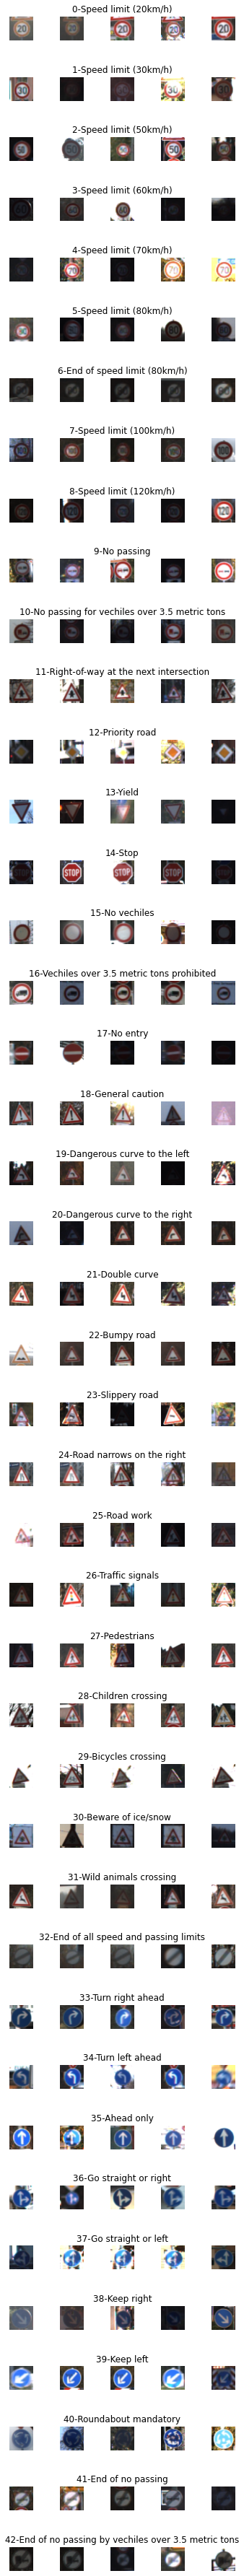

In [ ]:
    data = pd.read_csv('german-traffic-signs/signnames.csv')
    num_of_samples=[]
     
    cols = 5
    num_classes = 43
     
    fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
    fig.tight_layout()
     
    for i in range(cols):
        for j,row in data.iterrows():
          x_selected = X_train[y_train == j]
          axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('RdPu'))
          axs[j][i].axis("off")
          if i == 2:
            axs[j][i].set_title(str(j) + '-' + row['SignName'])
            num_of_samples.append(len(x_selected))
    #(index, Series)


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


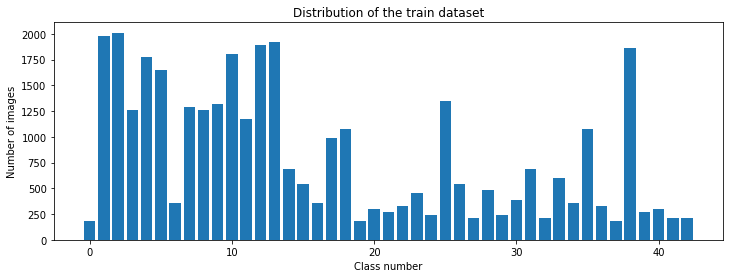

In [ ]:

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)

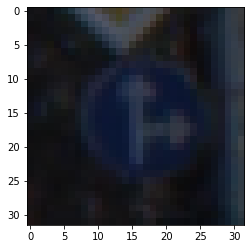

In [ ]:
plt.imshow(X_train[1000])
X_train[1000].shape


In [ ]:
def grayscale(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return gray
# img = X_train[1000]
# print("Image dimention before conversion is :", img.shape)
# img = grayscale(X_train[1000])
# plt.imshow(img,cmap='gray')
# print("Image dimention after conversion is :", img.shape)

In [ ]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

# img = equalize(img)
# plt.imshow(img,cmap='gray')
# print(img.shape)

In [ ]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

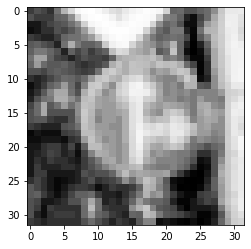

In [ ]:
hola = X_train[1000]
hola = preprocessing(hola)
plt.imshow(hola,cmap='gray')

In [ ]:
X_train = np.array(list(map(preprocessing,X_train)))

In [ ]:
X_val = np.array(list(map(preprocessing,X_val)))
X_test = np.array(list(map(preprocessing,X_test)))

(34799, 32, 32)


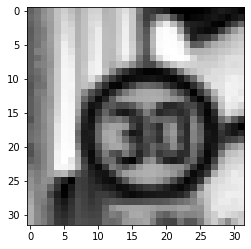

In [ ]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)],cmap='gray')
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799,32,32,1)

In [ ]:
X_val = X_val.reshape(4410,32,32,1)
X_test = X_test.reshape(12630,32,32,1)

In [ ]:
from keras.preprocessing.image  import ImageDataGenerator

dataGen = ImageDataGenerator(width_shift_range = 0.1,
                   height_shift_range = 0.1,
                   zoom_range = 0.2,
                   shear_range = 0.1,
                   rotation_range = 10)
dataGen.fit(X_train)

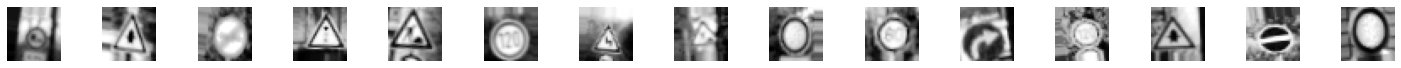

In [ ]:
batches = dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)

fig,axs = plt.subplots(1,15,figsize =(20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32),cmap='gray')
  axs[i].axis('off')

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [ ]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
y_val = to_categorical(y_val,43)

In [ ]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60,(5,5),input_shape = (32,32,1),activation= 'relu'))
  model.add(Conv2D(60,(5,5),activation='relu'))
  
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  # model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  #compile model
  model.compile(Adam(lr=0.001),loss = 'categorical_crossentropy',metrics=['accuracy']) #changed lr 10 0.001 from 0.01 default increased accuracy
  return model

In [ ]:
model = modified_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)              

In [ ]:
history = model.fit_generator(dataGen.flow(X_train,y_train,batch_size=50),steps_per_epoch=2000,epochs=10,validation_data=(X_val,y_val),shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 59s 30ms/step - loss: 0.9573 - accuracy: 0.7205 - val_loss: 0.1188 - val_accuracy: 0.9639
Epoch 2/10
2000/2000 [==============================] - 57s 29ms/step - loss: 0.2201 - accuracy: 0.9326 - val_loss: 0.0505 - val_accuracy: 0.9864
Epoch 3/10
2000/2000 [==============================] - 57s 28ms/step - loss: 0.1500 - accuracy: 0.9539 - val_loss: 0.0502 - val_accuracy: 0.9844
Epoch 4/10
2000/2000 [==============================] - 57s 28ms/step - loss: 0.1184 - accuracy: 0.9630 - val_loss: 0.0321 - val_accuracy: 0.9905
Epoch 5/10
2000/2000 [==============================] - 58s 29ms/step - loss: 0.0978 - accuracy: 0.9699 - val_loss: 0.0612 - val_accuracy: 0.9814
Epoch 6/10
2000/2000 [==============================] - 58s 29ms/step - loss: 0.0908 - accuracy: 0.9718 - val_loss: 0.0552 - val_accuracy: 0.9850
Epoch 7/10
2000/2000 [==============================] - 58s 29ms/step - loss: 0.0773 - accuracy: 0.9760 - val_loss: 0.0238 -

Text(0.5, 0, 'epoch')

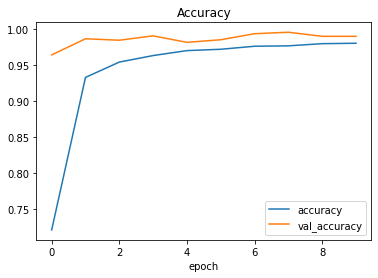

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

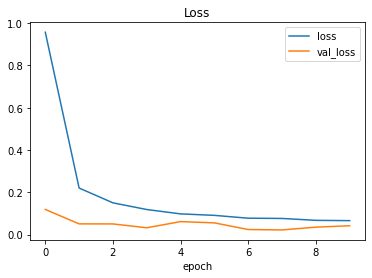

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(x=X_test,y=y_test,verbose=0)
print(score)

[0.12521613809593524, 0.9732383489608765]


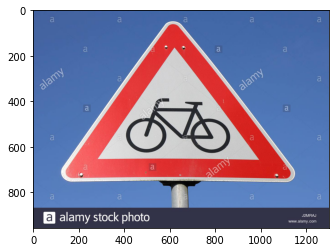

In [ ]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


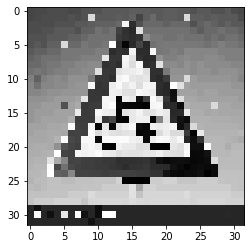

In [ ]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [29]
